In [1]:
from utility import *

for l in [4, 8, 12, 16, 20]:
    print(f'############## {l} ###############')
    for cov in ['cov2', 'cov1', 'cov3over4', 'cov1over2']:
        precision = precisionOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/calledIBD/{cov}/ch3_{l}cm/ibd.summary.csv', \
            f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/simGeno/ch3_{l}cm/ibd_info.csv')
        power = powerOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/calledIBD/{cov}/ch3_{l}cm/ibd.summary.csv', \
            f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/simGeno/ch3_{l}cm/ibd_info.csv')
        #print(f'precision for {cov}: {precision}')
        print(f'power for {cov}: {power}')

############## 4 ###############
power for cov2: 0.9871778241209342
power for cov1: 0.9849141454043233
power for cov3over4: 0.9866015027165059
power for cov1over2: 0.985896762426539
############## 8 ###############
power for cov2: 0.9929130301625259
power for cov1: 0.9922254256222522
power for cov3over4: 0.9924587240416114
power for cov1over2: 0.9921297680539525
############## 12 ###############
power for cov2: 0.996231149616199
power for cov1: 0.9960977809940156
power for cov3over4: 0.9960190263885313
power for cov1over2: 0.9955024835769433
############## 16 ###############
power for cov2: 0.9964925051713578
power for cov1: 0.9961587459950173
power for cov3over4: 0.9963781038232704
power for cov1over2: 0.9961079298927528
############## 20 ###############
power for cov2: 0.9972041316137581
power for cov1: 0.9971199213046031
power for cov3over4: 0.9972370868203738
power for cov1over2: 0.9972334496628692


Saved to ./fig/cov2.png


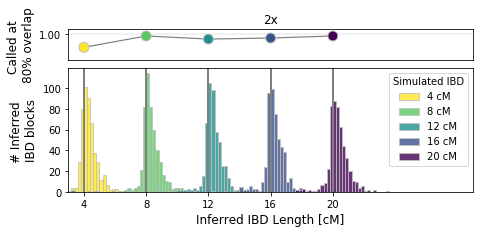

[0.974, 0.996, 0.99, 0.992, 0.996]
Saved to ./fig/cov1.png


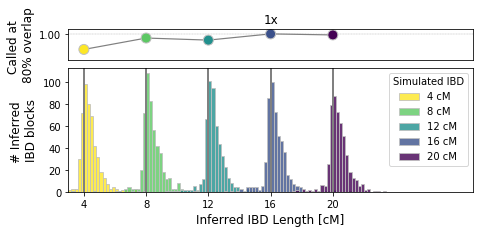

[0.97, 0.992, 0.988, 1.0, 0.998]
Saved to ./fig/cov3over4.png


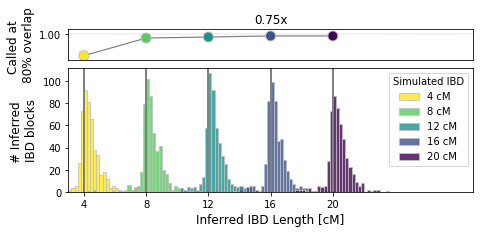

[0.958, 0.992, 0.994, 0.996, 0.996]
Saved to ./fig/cov1over2.png


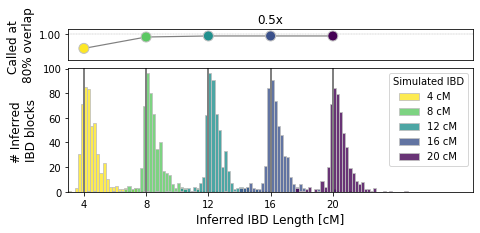

[0.972, 0.994, 0.996, 0.996, 0.996]
Saved to ./fig/cov1over4.png


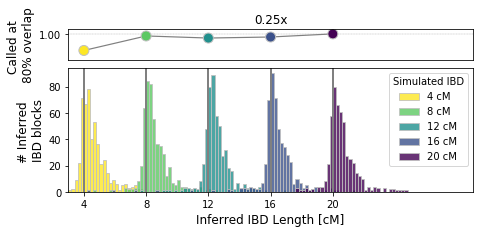

[0.968, 0.996, 0.992, 0.994, 1.0]
Saved to ./fig/cov1over10.png


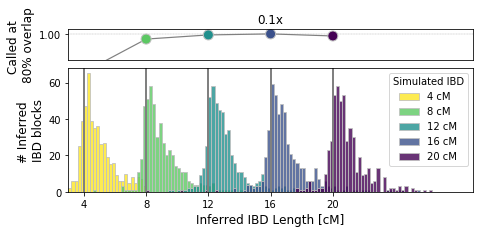

[0.926, 0.99, 0.998, 1.0, 0.996]


In [2]:
import pandas as pd
import sys
sys.path.append('/mnt/archgen/users/yilei/tools/hapBLOCK/notebook/simulate/python')
from plot_funcs import plot_power_yilei, plot_fp_distribution
from utility import *

bl_lens = [4, 8, 12, 16, 20]
cov2str = {'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}

for cov, title in cov2str.items():

    df_fp = pd.read_csv(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_wgs/calledIBD/{cov}/ch3_0cm/ibd.summary.csv', sep=',')
    df_called, power = lengthCallAll(bl_lens, cov, '/mnt/archgen/users/yilei/IBDsim/realMosaicSim_wgs/calledIBD', threshold=0.8)
    plot_power_yilei(bl_lens, df_called, power, df_fp=[], title=cov2str[cov], 
           savepath=f"./fig/{cov}.png", figsize=(7.25,3), ylim_pow=[0.95,1.01], hspace=0.1,
           fs_l=10, fs=12, 
           xlim=[3,29])
    print(power)

number of 1240k samples: 5896


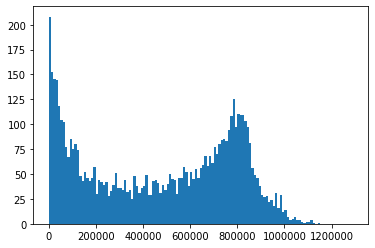

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv('/mnt/sequencedb/gendivdata/2_genotypes/allen_ancient_dna_resource/v52/v52.2_1240K_public.anno', sep='\t')
sample_1240k = data[data['Data source'] == '1240K']
print(f'number of 1240k samples: {len(sample_1240k)}')

bins = np.arange(0, 1300000, 10000)
import matplotlib.pyplot as plt
plt.hist(num1240Khits, bins=bins)
plt.show()

correlation: [[1.         0.74753266]
 [0.74753266 1.        ]]


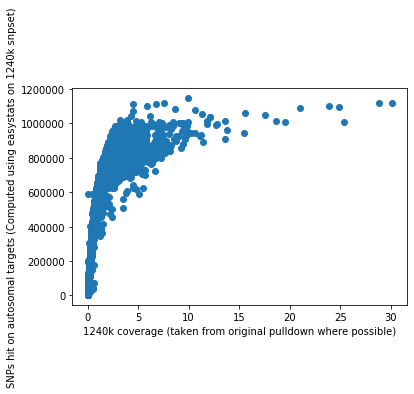

In [33]:
xlabel='1240k coverage (taken from original pulldown where possible)'
ylabel='SNPs hit on autosomal targets (Computed using easystats on 1240k snpset)'

subset = sample_1240k[xlabel] != '..'
sample_1240k = sample_1240k[subset]

coverage1240K = np.array(sample_1240k[xlabel], dtype=np.float32)
num1240Khits = np.array(sample_1240k[ylabel], dtype=np.int32)
print(f'correlation: {np.corrcoef(coverage1240K, num1240Khits)}')
plt.scatter(coverage1240K, num1240Khits)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.savefig('coverage.1240k.png', dpi=300)

sample_1240k[coverage1240K>8].to_csv('1240k.highcov.anno.tsv', sep='\t')

In [2]:
import pandas as pd

data = pd.read_csv('/mnt/sequencedb/gendivdata/2_genotypes/allen_ancient_dna_resource/v52/v52.2_1240K_public.anno', sep='\t')
data = data[data['Data source'] == '1240K']

iids_highcov_wgs = []
with open('/mnt/archgen/users/yilei/IBDsim/realMosaicSim/iid.list') as f:
    for line in f:
        iid = line.strip()
        iids_highcov_wgs.append(iid)

data = data[data['Master ID'].isin(iids_highcov_wgs)]
data.to_csv('1240k_sample_withHighcovWGS.csv', sep=',')


In [25]:
print(num1240Khits[:100])

[ 590693  590361  590571  110533  144946  983564  487289  189178  158917
  476279   14802    7912   98500  131119   85253  436715  146505  124479
  166176   46053   45439   20076   13967  290291   45376  238124  308943
 1078358  881545  226856  534002  292844  406429  595901   43174  216396
  211381  188830   93708   95751   67380  213964   26520   30457  446927
  569183  813622   31605  110981  824182  284105  835204  649225  619022
  181851  390870   60494  190166  620077  581308  742447  332598  115827
  125754  760685  895907  659984  210049  549359  379212  338749  775366
   91779  814980  795773  735609  696551  827122  800238  813263  621454
  705181  828797  322819  842569  850709  853050  810008  656606  259439
  341023  217992    7017  897878   39670  830976  810752  903978  376502
  868957]
